# EDA

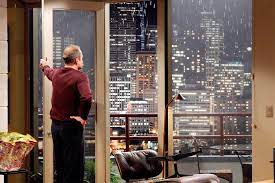

In [2]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests




from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
df = pd.read_csv('./data/eda.csv')

#converting to proper datetime format
df.date = pd.to_datetime(df.date)
df.head(20)

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,house_id,id.1
0,7129300520,3.000,1.000,1180.000,5650.000,1.000,NaN,0.000,3,7,...,0.000,98178,47.511,-122.257,1340.000,5650.000,2014-10-13,221900.000,7129300520,1
1,6414100192,3.000,2.250,2570.000,7242.000,2.000,0.000,0.000,3,7,...,19910.000,98125,47.721,-122.319,1690.000,7639.000,2014-12-09,538000.000,6414100192,2
2,5631500400,2.000,1.000,770.000,10000.000,1.000,0.000,0.000,3,6,...,NaN,98028,47.738,-122.233,2720.000,8062.000,2015-02-25,180000.000,5631500400,3
3,2487200875,4.000,3.000,1960.000,5000.000,1.000,0.000,0.000,5,7,...,0.000,98136,47.521,-122.393,1360.000,5000.000,2014-12-09,604000.000,2487200875,4
4,1954400510,3.000,2.000,1680.000,8080.000,1.000,0.000,0.000,3,8,...,0.000,98074,47.617,-122.045,1800.000,7503.000,2015-02-18,510000.000,1954400510,5
5,7237550310,4.000,4.500,5420.000,101930.000,1.000,0.000,0.000,3,11,...,0.000,98053,47.656,-122.005,4760.000,101930.000,2014-05-12,1230000.000,7237550310,6
6,1321400060,3.000,2.250,1715.000,6819.000,2.000,0.000,0.000,3,7,...,0.000,98003,47.310,-122.327,2238.000,6819.000,2014-06-27,257500.000,1321400060,7
7,2008000270,3.000,1.500,1060.000,9711.000,1.000,0.000,NaN,3,7,...,0.000,98198,47.410,-122.315,1650.000,9711.000,2015-01-15,291850.000,2008000270,8
8,2414600126,3.000,1.000,1780.000,7470.000,1.000,0.000,0.000,3,7,...,0.000,98146,47.512,-122.337,1780.000,8113.000,2015-04-15,229500.000,2414600126,9
9,3793500160,3.000,2.500,1890.000,6560.000,2.000,0.000,0.000,3,7,...,0.000,98038,47.368,-122.031,2390.000,7570.000,2015-03-12,323000.000,3793500160,10


In [4]:
list_of_content = df.columns 
for x in list_of_content: 
    print(f" \n{x}:\n\n {df[x].unique()}")

 
id:

 [7129300520 6414100192 5631500400 ... 1523300141  291310100 1523300157]
 
bedrooms:

 [ 3.  2.  4.  5.  1.  6.  7.  8.  9. 11. 10. 33.]
 
bathrooms:

 [1.   2.25 3.   2.   4.5  1.5  2.5  1.75 2.75 3.25 4.   3.5  0.75 4.75
 5.   4.25 3.75 1.25 5.25 6.   0.5  5.5  6.75 5.75 8.   7.5  7.75 6.25
 6.5 ]
 
sqft_living:

 [1180. 2570.  770. ... 3087. 3118. 1425.]
 
sqft_lot:

 [ 5650.  7242. 10000. ...  5813.  2388.  1076.]
 
floors:

 [1.  2.  1.5 3.  2.5 3.5]
 
waterfront:

 [nan  0.  1.]
 
view:

 [ 0. nan  3.  4.  2.  1.]
 
condition:

 [3 5 4 1 2]
 
grade:

 [ 7  6  8 11  9  5 10 12  4  3 13]
 
sqft_above:

 [1180. 2170.  770. 1050. 1680. 3890. 1715. 1060. 1890. 1860.  860. 1430.
 1370. 1810. 1980. 1600. 1200. 1250. 2330. 2270. 1070. 2450. 1710. 1750.
 1400.  790. 2570. 2320. 1190. 1510. 1090. 1280.  930. 2360.  890. 2620.
 2600. 3595. 1570.  920. 3160.  990. 2290. 2165. 1640. 1000. 2130. 2830.
 2250. 2420. 3250. 1850. 1590. 1260. 2519. 1540. 1110. 1770. 2720. 2240.
 3070. 2380. 

In [5]:
df.info

<bound method DataFrame.info of                id  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0      7129300520     3.000      1.000     1180.000  5650.000   1.000   
1      6414100192     3.000      2.250     2570.000  7242.000   2.000   
2      5631500400     2.000      1.000      770.000 10000.000   1.000   
3      2487200875     4.000      3.000     1960.000  5000.000   1.000   
4      1954400510     3.000      2.000     1680.000  8080.000   1.000   
...           ...       ...        ...          ...       ...     ...   
21592   263000018     3.000      2.500     1530.000  1131.000   3.000   
21593  6600060120     4.000      2.500     2310.000  5813.000   2.000   
21594  1523300141     2.000      0.750     1020.000  1350.000   2.000   
21595   291310100     3.000      2.500     1600.000  2388.000   2.000   
21596  1523300157     2.000      0.750     1020.000  1076.000   2.000   

       waterfront  view  condition  grade  ...  yr_renovated  zipcode    lat  \
0          

In [6]:
df.duplicated().value_counts()


False    21597
Name: count, dtype: int64

In [7]:
df.columns



Index(['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'date', 'price', 'house_id', 'id.1'],
      dtype='object')

In [8]:
df.dtypes

id                        int64
bedrooms                float64
bathrooms               float64
sqft_living             float64
sqft_lot                float64
floors                  float64
waterfront              float64
view                    float64
condition                 int64
grade                     int64
sqft_above              float64
sqft_basement           float64
yr_built                  int64
yr_renovated            float64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15           float64
sqft_lot15              float64
date             datetime64[ns]
price                   float64
house_id                  int64
id.1                      int64
dtype: object

In [9]:
# Load the dataset
#file_path = 'path_to_your_file.csv'  # Replace with the path to your file
#data = pd.read_csv(file_path)

# Create a base map centered on the average latitude and longitude
#map_center = [data['lat'].mean(), data['long'].mean()]
#m = folium.Map(location=map_center, zoom_start=10, tiles='Stamen Toner')

# Add house locations to the map
#for _, row in data.iterrows():
#    folium.CircleMarker(
#        location=[row['lat'], row['long']],  # Latitude and Longitude
#        radius=2,  # Size of the marker
#        color='blue',  # Marker color
#        fill=True,  # Fill the marker
#        fill_opacity=0.5,  # Transparency
#   ).add_to(m)

# Save the map to an HTML file
#m.save('house_locations_map.html')

#print("Map has been saved as 'house_locations_map.html'. Open this file in your browser to view it.")

In [10]:
unique_zipcodes = df['zipcode'].unique()  # Get unique zip codes
num_unique_zipcodes = len(unique_zipcodes)  # Count the number of unique zip codes

print(f"Number of unique zip codes: {num_unique_zipcodes}")
print("Unique zip codes:", unique_zipcodes)

Number of unique zip codes: 70
Unique zip codes: [98178 98125 98028 98136 98074 98053 98003 98198 98146 98038 98007 98115
 98107 98126 98019 98103 98002 98133 98040 98092 98030 98119 98112 98052
 98027 98117 98058 98001 98056 98166 98023 98070 98148 98105 98042 98008
 98059 98122 98144 98004 98005 98034 98075 98116 98010 98118 98199 98032
 98045 98102 98077 98108 98168 98177 98065 98029 98006 98109 98022 98033
 98155 98024 98011 98031 98106 98072 98188 98014 98055 98039]


In [ ]:
def get_city_by_zip(zip_code):
    try:
        # Make API request for the zip code (This works for US zip codes)
        response = requests.get(f'http://api.zippopotam.us/us/{zip_code}')
        
        # If the response is successful and contains city info
        if response.status_code == 200:
            data = response.json()
            # Extract the city name from the response
            if 'places' in data:
                return data['places'][0]['place name']
            else:
                return None
        else:
            return None
    except Exception as e:
        # In case of any error (e.g., invalid zip code)
        return None

# Assuming your DataFrame is named df
# Apply the function to get the city for each zip code in the DataFrame
df['city'] = df['zipcode'].apply(lambda x: get_city_by_zip(str(x)))  # Ensure zip codes are in string format

# Display the first few rows with city names
print(df[['zipcode', 'city']].head())

In [ ]:
df.tail(20)

In [ ]:
# Group the houses by 'zipcode' and then sort by 'price' within each group
grouped_by_zip = df.groupby('zipcode').apply(lambda x: x.sort_values('price', ascending=False))

# Resetting the index for better readability
grouped_by_zip.reset_index(drop=True, inplace=True)

# Display the first few rows to check
print(grouped_by_zip[['house_id','zipcode','date', 'price', 'condition', 'grade','yr_renovated', 'yr_renovated']].head(20))

In [ ]:


# Scatter plot with seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x='yr_renovated', y='price', data=df, alpha=0.5, color='blue')
plt.title('Price vs. Year Renovated')
plt.xlabel('Year Renovated')
plt.ylabel('Price')
plt.grid(True)
plt.show()